<a href="https://colab.research.google.com/github/Mlnvl/python_classp/blob/main/Python_V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Programming for Business Analytics - Basics of Python - IV

In [1]:
# Libraries
# We'll use matplotlib, seaborn, and plotly to explore data visualization techniques in Python.

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np

In [2]:
# Example Dataset: Sales Data
# We will use synthetic sales data to simulate real-world cases.
np.random.seed(42)
data = {
    "Date": pd.date_range(start="2024-01-01", periods=365, freq="D"),
    "Product": np.random.choice(["Product A", "Product B", "Product C"], 365),
    "Region": np.random.choice(["North", "South", "East", "West"], 365),
    "Sales": np.random.randint(100, 1000, 365),
    "Profit": np.random.uniform(10, 500, 365),
    "Units Sold": np.random.randint(1, 20, 365),
}
sales_data = pd.DataFrame(data)

sales_data.head()

,Date,Product,Region,Sales,Profit,Units Sold
0,2024-01-01,Product C,West,521,53.710121,8
1,2024-01-02,Product A,South,438,272.314426,18
2,2024-01-03,Product C,West,747,124.276042,12
3,2024-01-04,Product C,South,595,178.034163,15
4,2024-01-05,Product A,West,464,242.245271,9


## Matplotlib

 Matplotlib is a foundational library for static, 2D plotting in Python, suitable for creating basic and highly customized plots.

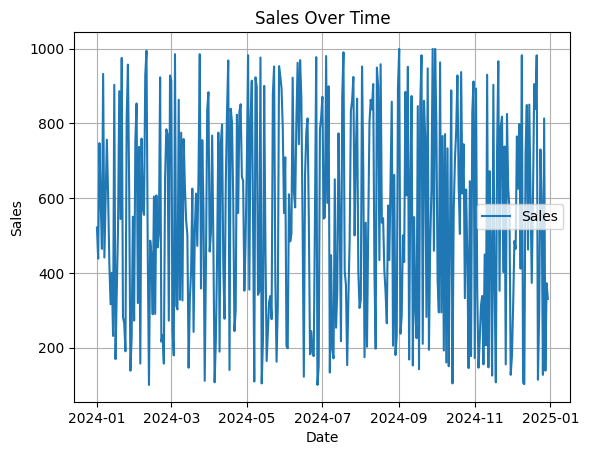

In [3]:
# Basic Line Plot (matplotlib)
# Explanation:
# - `groupby("Date")["Sales"].sum()`: Groups the data by date and calculates total sales for each day.
# - `plt.plot`: Plots the grouped data as a line graph.
sales_over_time = sales_data.groupby("Date")["Sales"].sum()
plt.plot(sales_over_time, label="Sales")      #is the chart the next ligne are to modify it
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid()
plt.show()

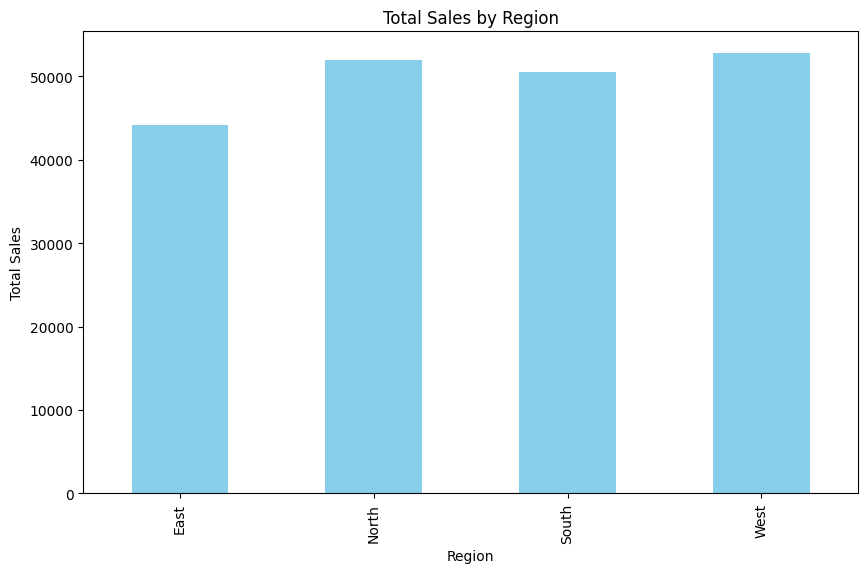

In [4]:
# Bar Chart (matplotlib)
# Explanation: This bar chart compares total sales across different regions, helping identify the most profitable regions.
# Key code explanation:
# - `groupby("Region")["Sales"].sum()`: Groups data by region and sums up sales.
# - `.plot(kind="bar")`: Creates a bar chart of the grouped data.
plt.figure(figsize=(10, 6))
sales_by_region = sales_data.groupby("Region")["Sales"].sum()
sales_by_region.plot(kind="bar", color="skyblue")  #needed to thus ligne after are imporvment
plt.title("Total Sales by Region")
plt.ylabel("Total Sales")
plt.show()

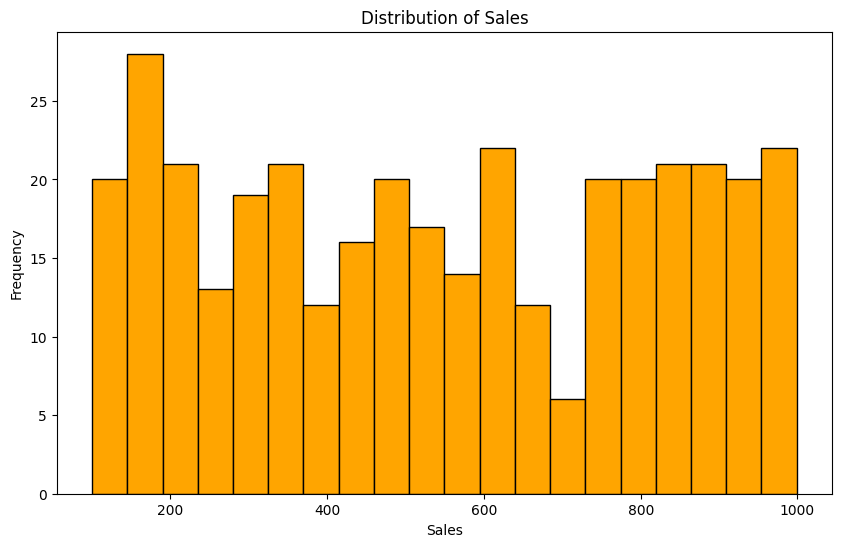

In [5]:
# Histogram (matplotlib)
# Explanation: This histogram visualizes the distribution of sales, showing the frequency of different sales amounts.
# Key code explanation:
# - `plt.hist`: Creates a histogram for the sales data.
# - `bins=20`: Defines the number of intervals (bins) for the histogram.
plt.figure(figsize=(10, 6))
plt.hist(sales_data["Sales"], bins=20, color="orange", edgecolor="black")
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

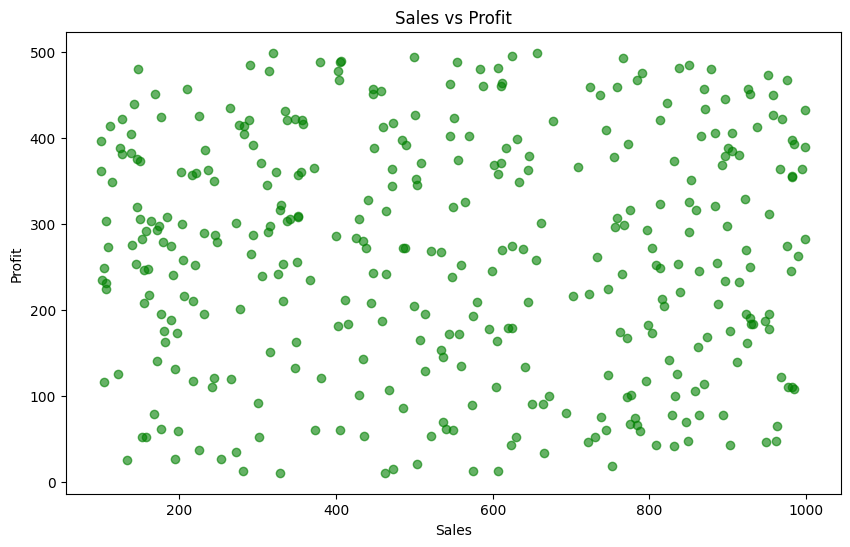

In [6]:
# Scatter Plot (matplotlib)
# Explanation: This scatter plot examines the relationship between sales and profit, helping identify trends or outliers.
# Key code explanation:
# - `plt.scatter`: Creates a scatter plot of sales vs. profit.
# - `alpha=0.6`: Adjusts the transparency of the points for better visibility.
plt.figure(figsize=(10, 6))
plt.scatter(sales_data["Sales"], sales_data["Profit"], alpha=0.6, c="green")
plt.title("Sales vs Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()

## Seaborn

Seaborn is built on top of Matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics.

Seaborn provides several key properties and settings to enhance the appearance and functionality of visualizations:
- `style`: Defines the overall aesthetic of the plots (e.g., "whitegrid", "darkgrid").
- `palette`: Controls the color scheme used for categorical data.
- `context`: Adjusts the scaling of plot elements (e.g., "paper", "talk", "poster").
- `hue`: Differentiates data based on a categorical variable in plots like scatter plots and pair plots.
- `annot`: Displays data values on plots like heatmaps and bar plots.

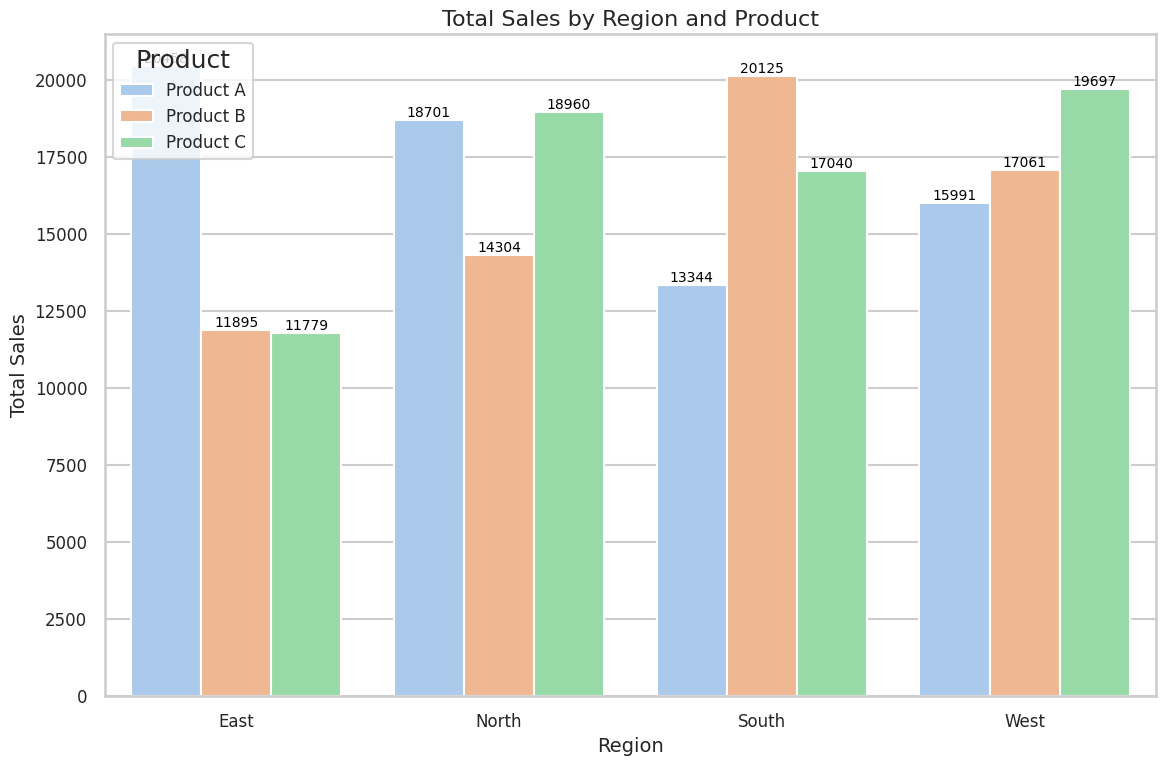

In [7]:
# Example of Seaborn Properties Usage
sns.set_theme(style="whitegrid", palette="pastel", context="talk")

# Using Seaborn Properties in Charts
# Let's demonstrate the use of all these properties in a single example chart.

plt.figure(figsize=(12, 8))
sales_by_region_product = sales_data.groupby(["Region", "Product"])["Sales"].sum().reset_index()
ax = sns.barplot(
    data=sales_by_region_product,
    x="Region",
    y="Sales",
    hue="Product",
    palette="pastel"
)
# Adding annotations to display values
# ax.bar_label(container): Annotates bars in the container with their respective values.
# label_type="edge": Positions the labels at the edge of the bars.
# fmt="%.0f": Formats the labels as integers.
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", fontsize=10, color="black")

plt.title("Total Sales by Region and Product", fontsize=16)
plt.xlabel("Region", fontsize=14)
plt.ylabel("Total Sales", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Product", fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# Heatmap (seaborn)
# Explanation: This heatmap shows the relationship between region and product, displaying sales values in a grid format.
# Key code explanation:
# - `pivot_table`: Rearranges the data into a matrix format.
# - `sns.heatmap`: Plots the matrix as a heatmap.
plt.figure(figsize=(10, 6))
sales_pivot = sales_data.pivot_table(index="Region", columns="Product", values="Sales", aggfunc="sum")
sns.heatmap(sales_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Sales Heatmap by Region and Product")
plt.show()

In [ ]:
# Pairplot (seaborn)
# Explanation: A pairplot provides a quick way to visualize relationships between multiple variables across regions.
# Key code explanation:
# - `sns.pairplot`: Generates pairwise scatter plots and histograms for selected variables.
# - `hue="Region"`: Differentiates points by region.
sns.pairplot(sales_data, vars=["Sales", "Profit", "Units Sold"], hue="Region", diag_kind="kde")
plt.suptitle("Pairplot of Key Metrics", y=1.02)
plt.show()

In [ ]:
# Boxplot (seaborn)
# Explanation: This boxplot summarizes the distribution of profit across regions, highlighting median and outliers.
# Key code explanation:
# - `sns.boxplot`: Plots the distribution of profit for each region.
plt.figure(figsize=(10, 6))
sns.boxplot(x="Region", y="Profit", data=sales_data, palette="pastel")
plt.title("Profit Distribution by Region")
plt.show()

In [ ]:
# Violin Plot (seaborn)
# Explanation: The violin plot combines boxplot and KDE to show the distribution of sales for each product category.
# Key code explanation:
# - `sns.violinplot`: Creates a violin plot for sales by product.
plt.figure(figsize=(10, 6))
sns.violinplot(x="Product", y="Sales", data=sales_data, palette="muted")
plt.title("Sales Distribution by Product")
plt.show()

In [ ]:
# Adding regression analysis to visualize correlation between Sales and Profit
sns.lmplot(data=sales_data, x="Sales", y="Profit", hue="Region", aspect=1.5, height=6)
plt.title("Regression Analysis: Sales vs Profit")
plt.show()

## Plotly

Plotly is a library for creating interactive plots, ideal for exploratory data analysis and presentations.

In [ ]:
# Line Plot with Interaction (plotly)
# Explanation: This interactive line plot shows daily sales trends, allowing users to hover and explore specific points.
# Key code explanation:
# - `px.line`: Creates an interactive line plot.
# - `reset_index()`: Resets the grouped data to a flat DataFrame for plotting.
fig = px.line(sales_data.groupby("Date")["Sales"].sum().reset_index(), x="Date", y="Sales", title="Interactive Sales Over Time")
fig.show()

In [ ]:
# Stacked Bar Chart (plotly)
# Explanation: This stacked bar chart compares total sales by region, further dividing them by product categories.
# Key code explanation:
# - `px.bar`: Generates a stacked bar chart.
# - `color="Product"`: Differentiates bars by product category.
stacked_data = sales_data.groupby(["Region", "Product"])["Sales"].sum().reset_index()
fig = px.bar(stacked_data, x="Region", y="Sales", color="Product", title="Stacked Sales by Region and Product")
fig.show()

In [ ]:
# Scatter Plot Matrix (plotly)
# Explanation: A scatter plot matrix visualizes pairwise relationships between sales, profit, and units sold.
# Key code explanation:
# - `px.scatter_matrix`: Creates a scatter matrix for selected variables.
# - `color="Region"`: Differentiates points by region.
fig = px.scatter_matrix(sales_data, dimensions=["Sales", "Profit", "Units Sold"], color="Region", title="Scatter Matrix")
fig.show()

In [ ]:
# Sunburst Chart (plotly)
# Explanation: The sunburst chart breaks down total sales hierarchically by region and product, providing insights into distribution.
# Key code explanation:
# - `px.sunburst`: Creates a sunburst chart based on hierarchical data.
# - `path`: Specifies the hierarchy (region -> product).
fig = px.sunburst(sales_data, path=["Region", "Product"], values="Sales", title="Sunburst of Sales")
fig.show()

In [ ]:
### Multi-Panel Dashboards
### Create dashboards that combine multiple Plotly graphs for an integrated overview of business performance.
### The specs argument defines the type of each subplot in the grid.
### specs is a list of lists, mirroring the subplot grid structure. Each inner list represents a row, and each element within the inner list represents a column.
### {"type": "xy"}: This indicates that the subplot should use Cartesian coordinates (x and y axes), suitable for plots like line charts, bar charts, and scatter plots.
### {"type": "domain"}: This is specifically for plots that don't use Cartesian coordinates, such as pie charts, sunburst charts, and ternary plots. It allows these plots to be placed within a subplot.

from plotly.subplots import make_subplots

# Creating a multi-panel dashboard
# specs=[[{"type": "xy"}, {"type": "xy"}], [{"type": "xy"}, {"type": "domain"}]] is used to define the type of each subplot
# "xy" is for line, bar, and scatter plots
# "domain" is for pie charts
fig = make_subplots(rows=2, cols=2, subplot_titles=("Sales Over Time", "Sales by Region", "Sales vs Profit", "Sales by Product"),
                    specs=[[{"type": "xy"}, {"type": "xy"}], [{"type": "xy"}, {"type": "domain"}]])


# Adding line plot
line_data = sales_data.groupby("Date")["Sales"].sum().reset_index()
fig.add_trace(px.line(line_data, x="Date", y="Sales").data[0], row=1, col=1)

# Adding bar chart
region_data = sales_data.groupby("Region")["Sales"].sum().reset_index()
fig.add_trace(px.bar(region_data, x="Region", y="Sales").data[0], row=1, col=2)

# Adding scatter plot
fig.add_trace(px.scatter(sales_data, x="Sales", y="Profit", color="Region").data[0], row=2, col=1)

# Adding pie chart
product_data = sales_data.groupby("Product")["Sales"].sum().reset_index()
fig.add_trace(px.pie(product_data, names="Product", values="Sales").data[0], row=2, col=2)

fig.update_layout(height=800, width=1000, title_text="Business Analytics Dashboard")
fig.show()

## Tasks

In [ ]:
# Task 1: Analyze the Distribution of Profit by Region
# Create a violin plot to compare profit distributions for different regions.

In [ ]:
# Task 2: Visualize Sales Trends for Each Product
# Use a line plot to visualize how sales for each product change over time.

## Solutions

In [ ]:
# Task 1: Analyze the Distribution of Profit by Region
# Create a violin plot to compare profit distributions for different regions.
# Shape and Width: The width of the violin at different profit levels indicates the density of profits. Wider areas show where profit values are more frequent.
# Median Line: The white dot in the middle of each violin represents the median profit for the respective region.
# Quartiles: The thick black bar within each violin shows the interquartile range (IQR).
# Tails: The thin lines extending from the IQR indicate the range of lower and upper profits, excluding outliers.
plt.figure(figsize=(12, 8))
sns.violinplot(x="Region", y="Profit", data=sales_data, palette="muted")
plt.title("Profit Distribution by Region", fontsize=16)
plt.xlabel("Region", fontsize=14)
plt.ylabel("Profit", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# Task 2: Visualize Sales Trends for Each Product
# Use a line plot to visualize how sales for each product change over time.
plt.figure(figsize=(12, 8))
product_sales_over_time = sales_data.groupby(["Date", "Product"])["Sales"].sum().reset_index()
sns.lineplot(data=product_sales_over_time, x="Date", y="Sales", hue="Product", palette="pastel")
plt.title("Sales Trends by Product", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.legend(title="Product", fontsize=12)
plt.tight_layout()
plt.show()